# ***Titanic_EDA_Student Sai Chand Sunkara***

In [1]:
import numpy as np                          #importing all packages for eda
import pandas as pd                         
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# ***step 1 :- variable identification :***

Dependent Variable:

1.survived
2.fare

Independent Variables:

1.gender
2.age
3.pclass
4.passenger id
5.name
6.parch
7.ticket
8.cabin
9.sibsp
10.embarked


In [2]:
ship = pd.read_csv('TITANIC.csv')
ship.head()                                 #reading the csv using pandas

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


String:

1.name
2.sex
3.ticket
4.cabin
5.embarked

Numeric:

1.passenger id
2.survived
3.pclass
4.sibsp
5.age
6.parch
7.fare

Variable Category:

Categorical:

1.survived
2.cabin
3.embarked
4.gender
5.pclass

Continuous:

1.age
2.fare

Discreet:

1.passenger id
2.name
3.parch
4.sibsp
5.ticket

In [4]:
ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# ***step 2 :- univariate analysis***

# categorical variables : bar plots

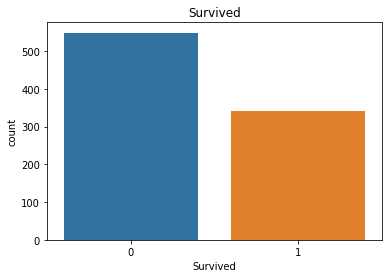

In [5]:
plt.title("Survived")                #survived
sns.countplot('Survived',data=ship)

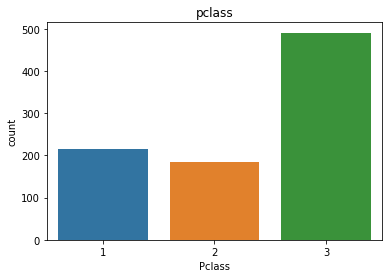

In [6]:
plt.title("pclass")                #pclass
sns.countplot('Pclass',data=ship)

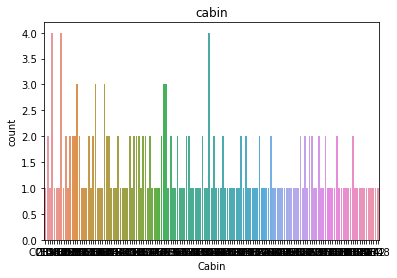

In [7]:
plt.title("cabin")                #cabin
sns.countplot('Cabin',data=ship)

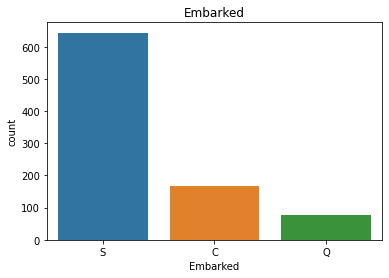

In [8]:
plt.title("Embarked")                #embarked
sns.countplot('Embarked',data=ship)

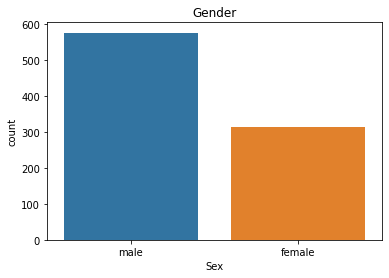

In [9]:
plt.title("Gender")                #gender
sns.countplot('Sex',data=ship)

# continous vaiables : box plots

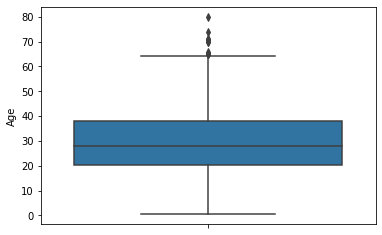

In [10]:
sns.boxplot(y='Age', data=ship)

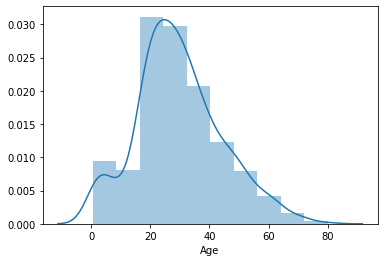

In [11]:
sns.distplot(ship['Age'], bins=10)

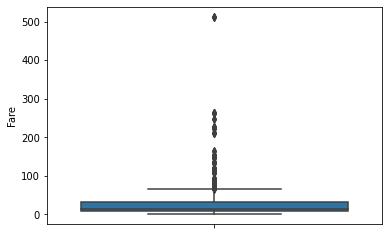

In [12]:
sns.boxplot(y='Fare', data=ship)

***In both "Age" and "Fare" we can find many outliers in them***

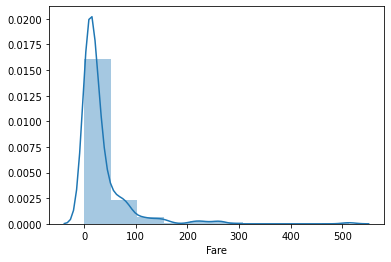

In [13]:
sns.distplot(ship['Fare'], bins=10)

# ***step 3 :- Bivariate analysis*** 

1.continuous vs continuous

2.categorical vs categorical

3.continuous vs categorical

***categorical vs categorical*** : ***gender vs survived***

In [14]:
ship.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

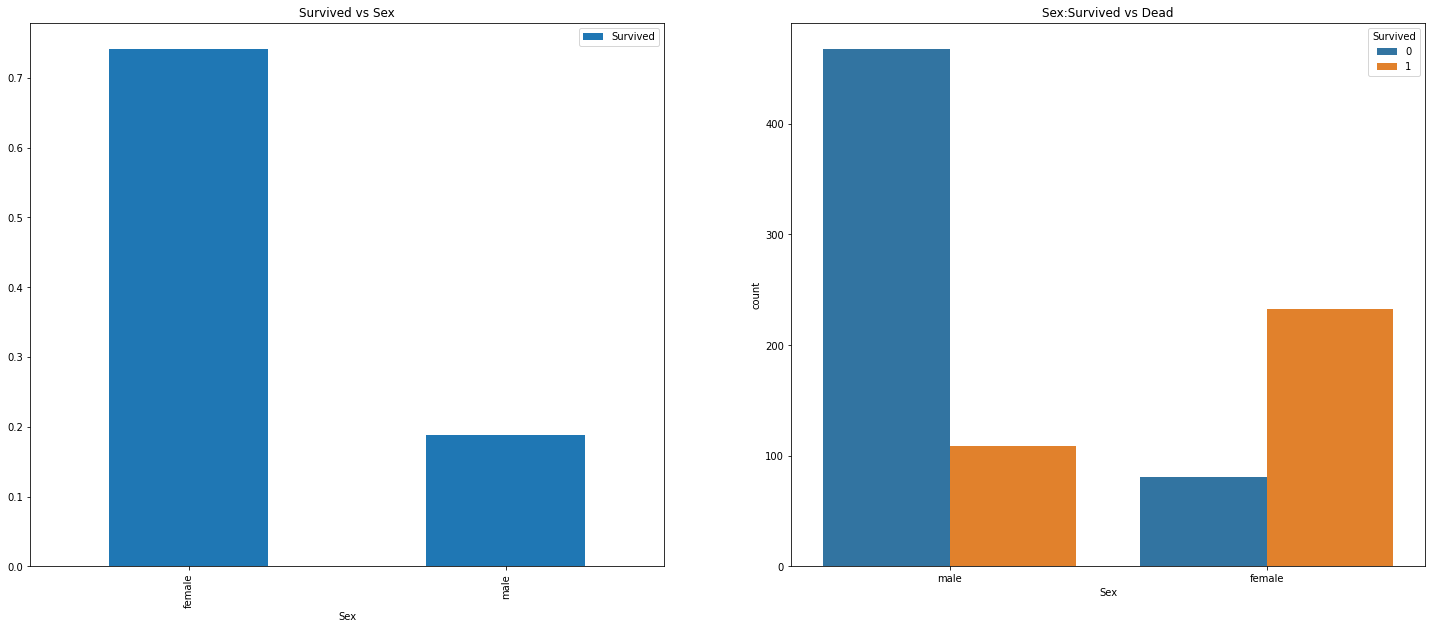

In [15]:
f,ax=plt.subplots(1,2,figsize=(25,10))
ship[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=ship,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

more number of women survived than men with women arround 75% and men arround 18%

***embarked, pclass, gender, survived crosstable and barplot***

In [16]:
pd.crosstab([ship.Embarked,ship.Pclass],[ship.Sex,ship.Survived],margins=True).style.background_gradient(cmap='hot_r')

***correation matrix :***

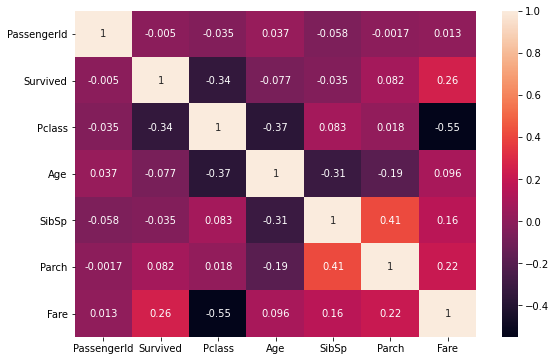

In [17]:
corr = ship.corr()
f,ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot = True)
plt.show()

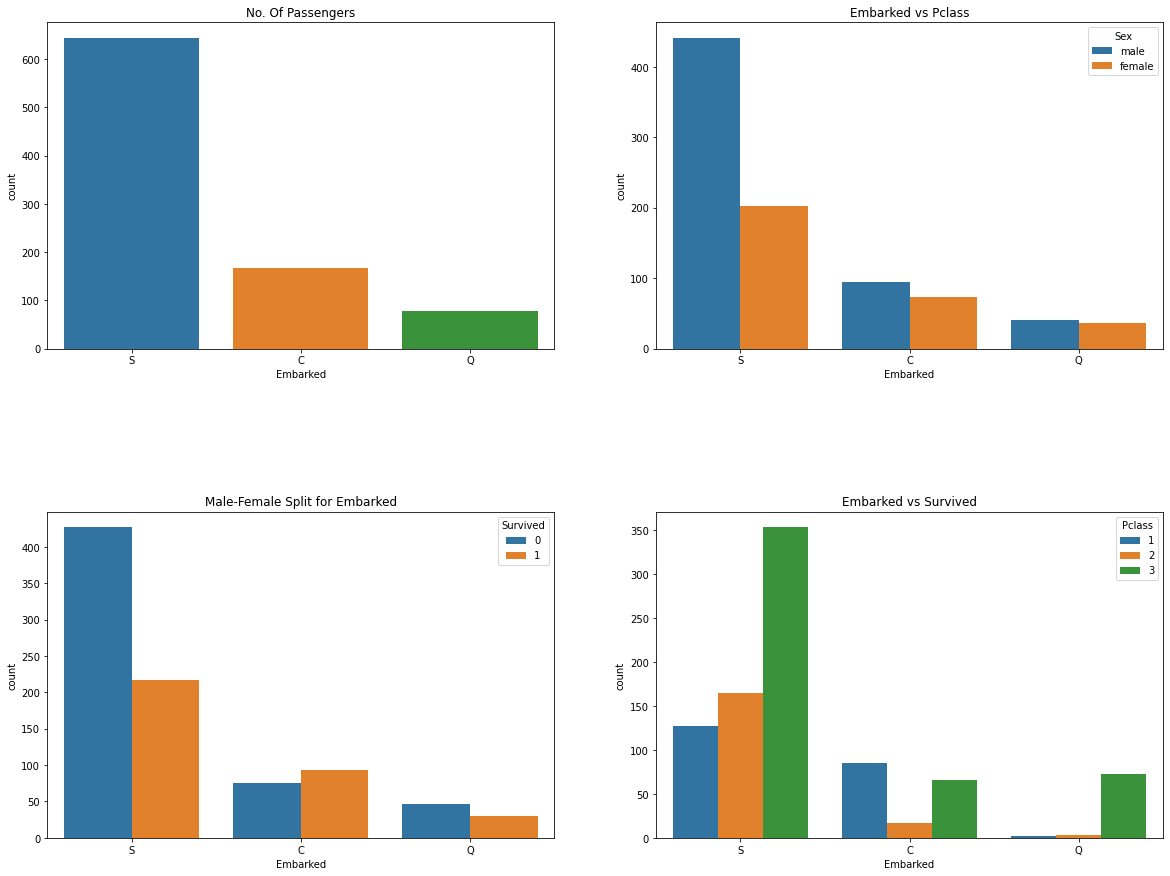

In [18]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=ship,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers')
sns.countplot('Embarked',hue='Sex',data=ship,ax=ax[0,1])
ax[0,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
ax[1,0].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=ship,ax=ax[1,0])
ax[1,1].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=ship,ax=ax[1,1])
plt.show()

***1.more number of passengers are in Embarked class "S"***

***2.In all embarkments more number of males are present***

***3.more people survived in C***

***4.In Q almost all are of pclass 3***


***categorical vs continuous*** : ***age vs survived***

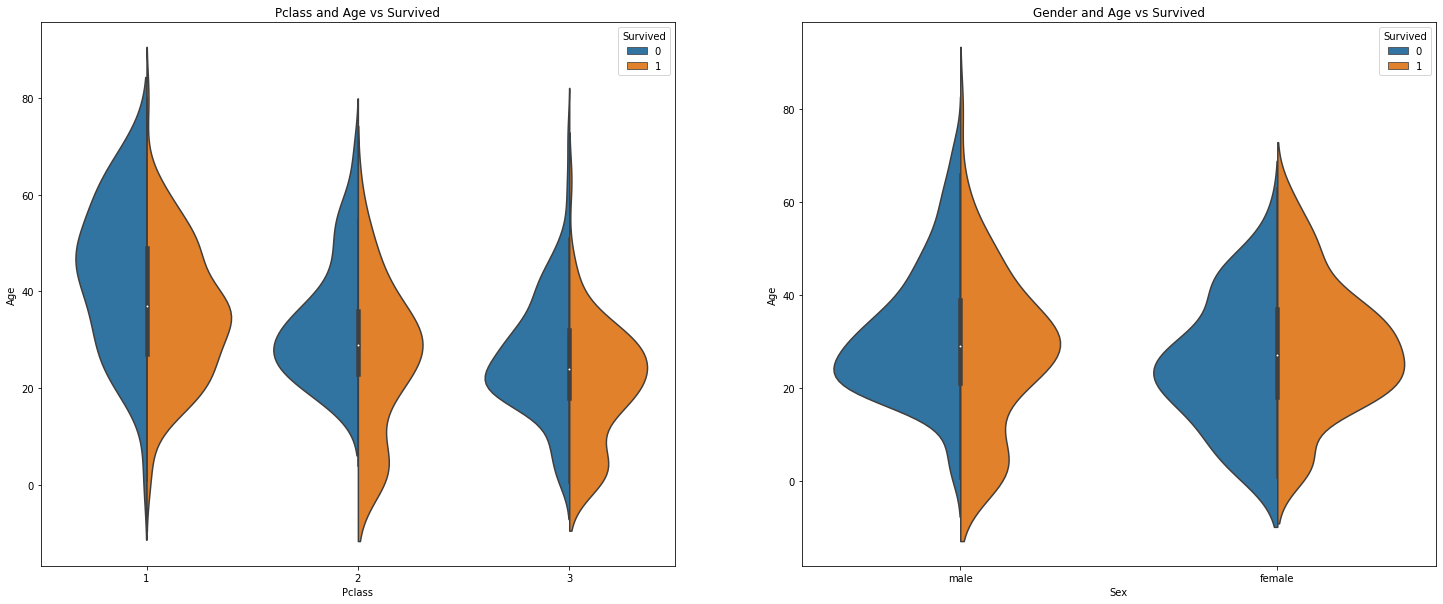

In [19]:
f,ax=plt.subplots(1,2,figsize=(25,10))
sns.violinplot("Pclass","Age", hue="Survived", data=ship,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
sns.violinplot("Sex","Age", hue="Survived", data=ship,split=True,ax=ax[1])
ax[1].set_title('Gender and Age vs Survived')
plt.show()

from the above violen plots :-
         
         pclass and age vs survived : 1.outliers in pclass 3
                                      2.pclass 1 has better distribution plot
                                      3.more age less chance of survival
         
         gender and age vs survived : 1.outliers are male 
                                      2.females has better distribution plot

# ***step 4 :- treating missing values***

***for age :***

Missing values in this case can be traeted by passengers names.
The addressing before the passenger names can be used to identify the passenger whether he/she is a mr.,mrs.,miss.,dr.,...etc. using this information we find the mean ages of every category and the mean value is added to the NaN values 

In [20]:
ship.isnull().sum() #total number of missing values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

missing values are in "Age" and "Cabin" and "Embarked"

***in this dataset we dont need "cabin" for any reference so we can remove cabin for treating missing values***

In [21]:
ship.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

In [22]:
data = ship
data['Addressing'] = data.Name.str.extract(r'([A-Za-z]+)\.', expand=False)
data.Addressing.value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Don           1
Sir           1
Lady          1
Ms            1
Capt          1
Mme           1
Countess      1
Jonkheer      1
Name: Addressing, dtype: int64

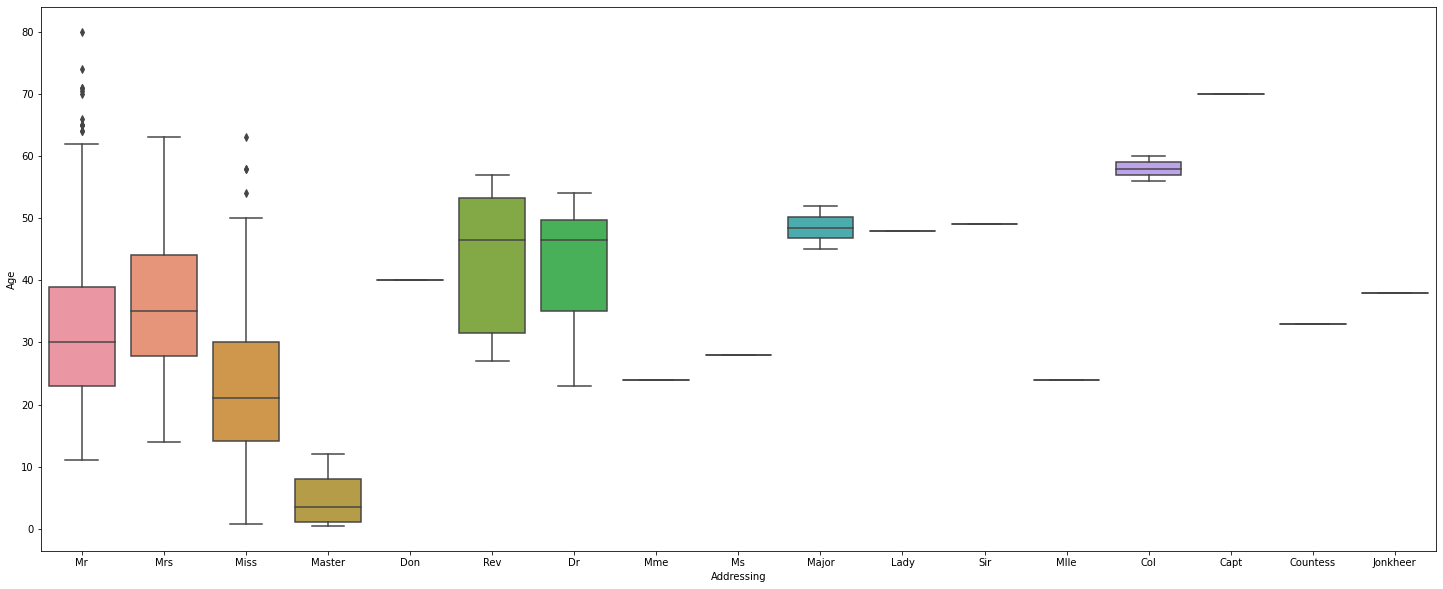

In [23]:
plt.figure(figsize=(25,10))
train_data = data[:len(ship)]
sns.boxplot(x='Addressing', y='Age', data=train_data)
plt.show()

In [24]:
ship['Addressing'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [25]:
ship.groupby('Addressing')['Age'].mean()

Addressing
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [26]:
data.loc[(ship.Age.isnull())&(data.Addressing=='Mr'),'Age']=33
data.loc[(ship.Age.isnull())&(data.Addressing=='Mrs'),'Age']=36
data.loc[(ship.Age.isnull())&(data.Addressing=='Master'),'Age']=5
data.loc[(ship.Age.isnull())&(data.Addressing=='Miss'),'Age']=22
data.loc[(ship.Age.isnull())&(data.Addressing=='Other'),'Age']=46

***for Embarked:***

for "embarked" as there are only two missing values we can fill them with the mode of all embarked values

In [27]:
#mode of embarked is "S" 

In [28]:
ship['Embarked'].fillna(ship.Embarked.mode()[0], inplace=True)

In [29]:
ship.isnull().sum()   #check again no need of "Cabin"

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Addressing       0
dtype: int64

# ***step 5 :- outliers detection***

Text(0.5, 1.0, 'Age')

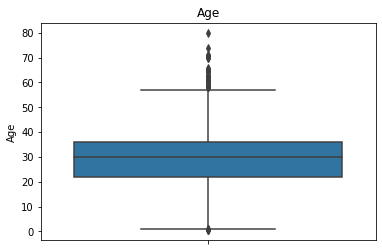

In [30]:
# detect outliers from Age, SibSp and Fare
sns.boxplot(y='Age', data=ship)
plt.title("Age")

Text(0.5, 1.0, 'Distplot of age')

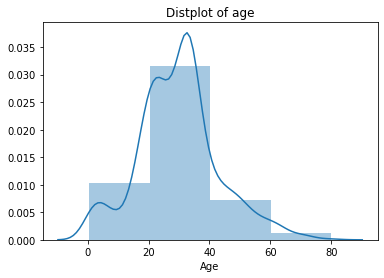

In [31]:
sns.distplot(ship['Age'], bins=4)
plt.title("Distplot of age")

Text(0.5, 1.0, 'Sibsp')

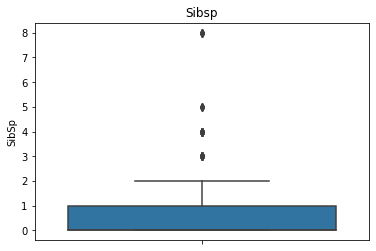

In [32]:
sns.boxplot(y='SibSp', data=ship)
plt.title("Sibsp")

Text(0.5, 1.0, 'Distplot of SibSp')

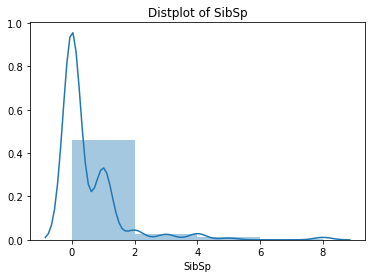

In [33]:
sns.distplot(ship['SibSp'], bins=4)
plt.title("Distplot of SibSp")

Text(0.5, 1.0, 'Fare')

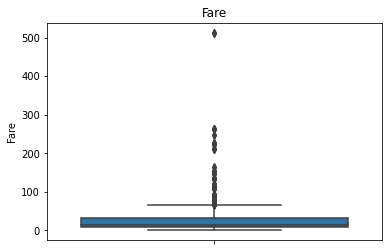

In [34]:
sns.boxplot(y='Fare', data=ship)
plt.title("Fare")

Text(0.5, 1.0, 'Distplot of Fare')

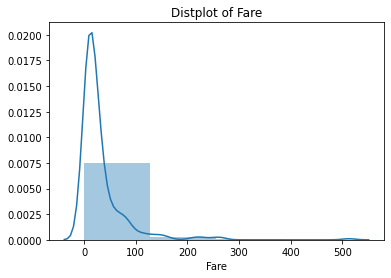

In [35]:
sns.distplot(ship['Fare'], bins=4)
plt.title("Distplot of Fare")

In [36]:
cols = ['Age', 'SibSp', 'Fare']
for i in cols:
    IQR = ship[i].quantile(0.75)-ship[i].quantile(0.25)
    print("inter-quartile range of {} is {}".format(i,IQR))
    Upper_OutlierLimit = ship[i].quantile(0.75) + 1.5*IQR
    Lower_OutlierLimit = ship[i].quantile(0.25) - 1.5*IQR
    print("upper outlier limit is",Upper_OutlierLimit)
    print("lower outlier limit is",Lower_OutlierLimit)
    print("")
    Outliers = pd.DataFrame(ship[(ship[i]>=Upper_OutlierLimit) | (ship[i]<=Lower_OutlierLimit)])

inter-quartile range of Age is 14.0
upper outlier limit is 57.0
lower outlier limit is 1.0

inter-quartile range of SibSp is 1.0
upper outlier limit is 2.5
lower outlier limit is -1.5

inter-quartile range of Fare is 23.0896
upper outlier limit is 65.6344
lower outlier limit is -26.724



In [37]:
Outliers

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Addressing
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,Mr
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.0,1,0,PC 17569,146.5208,B78,C,Mrs
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C,Mr
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,33.0,8,2,CA. 2343,69.5500,NaN,S,Mr
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,36.0,1,0,17453,89.1042,C92,C,Mrs
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.0,1,1,36928,164.8667,NaN,S,Mrs
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,22.0,8,2,CA. 2343,69.5500,NaN,S,Miss


***capping :***

In [38]:
indexes = list(Outliers.index)

In [39]:
for i in cols:
    for j in indexes:
        ship[i][j] = ship[i].quantile(0.95)

<ipython-input-39-407539c17981>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ship[i][j] = ship[i].quantile(0.95)


Text(0.5, 1.0, 'Age')

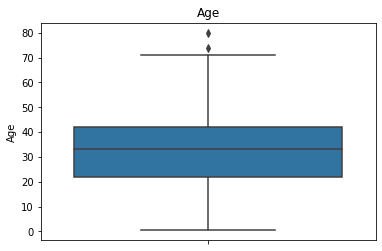

In [40]:
sns.boxplot(y='Age', data=ship)
plt.title("Age")

Text(0.5, 1.0, 'SibSp')

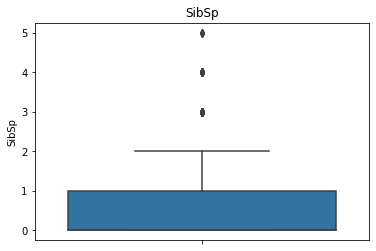

In [41]:
sns.boxplot(y='SibSp', data=ship)
plt.title("SibSp")

Text(0.5, 1.0, 'Fare')

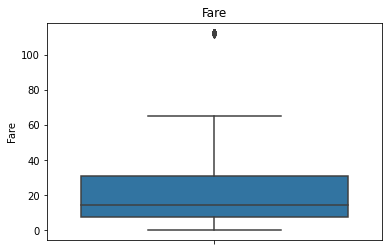

In [42]:
sns.boxplot(y='Fare', data=ship)
plt.title("Fare")

***outliers are mostly handled using quantile of 95%***

# ***step 6 :-feature engineering-dummy variable creation***

***drop the useless columns***

In [43]:
cols = ['Name', 'Ticket', 'Cabin']
ship = ship.drop(cols, axis=1)

In [44]:
ship          #df used at prediction

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Addressing
0,1,0,3,male,22.0,1,0,7.25000,S,Mr
1,2,1,1,female,54.0,3,0,112.07915,C,Mrs
2,3,1,3,female,26.0,0,0,7.92500,S,Miss
3,4,1,1,female,35.0,1,0,53.10000,S,Mrs
4,5,0,3,male,35.0,0,0,8.05000,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.00000,S,Other
887,888,1,1,female,19.0,0,0,30.00000,S,Miss
888,889,0,3,female,22.0,1,2,23.45000,S,Miss
889,890,1,1,male,26.0,0,0,30.00000,C,Mr


In [45]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     891 non-null    object 
 9   Addressing   891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [46]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(ship[col], drop_first=True))

***"Pclass", "Sex", "Embarked" are the columns where we can create dummies***

In [47]:
dummydf = pd.concat(dummies, axis=1)
dummydf.head(10)

,2,3,male,Q,S
0,0,1,1,0,1
1,0,0,0,0,0
2,0,1,0,0,1
3,0,0,0,0,1
4,0,1,1,0,1
5,0,1,1,1,0
6,0,0,1,0,1
7,0,1,1,0,1
8,0,1,0,0,1
9,1,0,0,0,0


from the above 'dummydf' we can identify pclass, gender, embarkment easily. so we could able to drop the Pclass, Sex, Embarked columns from the main dataframe and concat the dummydf to the main dataframe.

# ***step 7 :- feature engineering-variable transformations*** 

In [48]:
ship.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,32.496352,0.771044,0.381594,30.131379
std,257.353842,0.486592,0.836071,14.751771,1.203596,0.806057,34.260377
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,33.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,42.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,112.677075


variable transformations are done to change the scale of the variable with respect to the remaining features.
So we scale the age and the fare feature to value ranges close to those of our remaining features.
this can be achieved by standard scaling (z-score) where mean is 0 and variance is 1.

***for Age :***

Text(0.5, 1.0, 'histogram for Age')

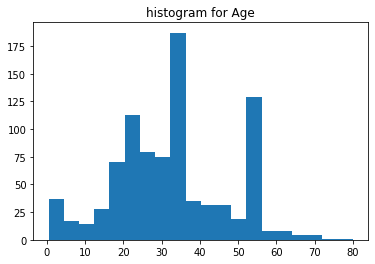

In [49]:
plt.hist(ship['Age'],bins=20)
plt.title("histogram for Age")

***mean < median so left skewed***

In [50]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
ship.Age = scaler.fit_transform(ship.Age.values.reshape(-1, 1))

***A normal probability plot can tell if data fits a normal distribution. A straight line in a normal probability plot indicates your data is normally distributed. A skewed line means that your data is not normally distributed.***

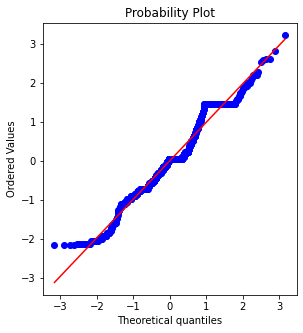

In [51]:
import scipy.stats as stat          #scipy has a stat lib. to display probplot                                
plt.figure(figsize=(10,5))          #to check whether the feature is normally distributed ot not
ship["Age"].hist()
plt.subplot(1,2,2)
stat.probplot(ship["Age"],dist='norm',plot=plt)
plt.show()

***for Fare :***

Text(0.5, 1.0, 'histogram for Fare')

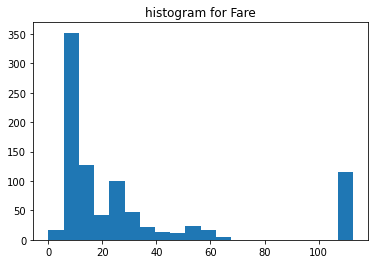

In [52]:
plt.hist(ship['Fare'],bins=20)
plt.title("histogram for Fare")

***mean > median so right skewed***

for fare feature a simple log transformation can be done to scale it. But still we dont have zero mean and unit variance, in order to achieve this we can again do standard scaling after log transformation.

In [53]:
ship['Fare']=np.log1p(ship['Fare'])

In [54]:
ship.Fare = scaler.fit_transform(ship.Fare.values.reshape(-1,1))

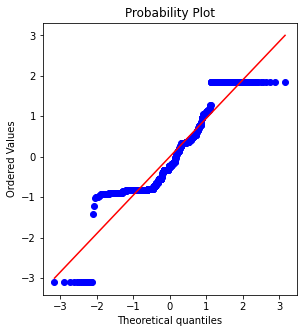

In [55]:
plt.figure(figsize=(10,5))   
ship["Fare"].hist()
plt.subplot(1,2,2)
stat.probplot(ship["Fare"],dist='norm',plot=plt)
plt.show()

Text(0.5, 1.0, 'New Dist plot for Age after variable transformation')

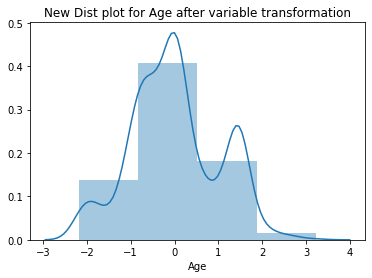

In [56]:
sns.distplot(ship['Age'], bins=4)
plt.title("New Dist plot for Age after variable transformation")

Text(0.5, 1.0, 'New Dist plot for Fare after variable transformation')

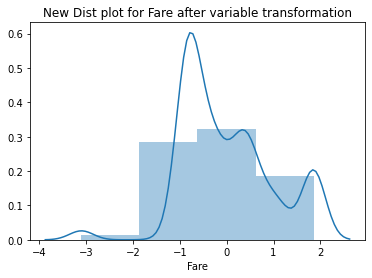

In [57]:
sns.distplot(ship['Fare'], bins=4)
plt.title("New Dist plot for Fare after variable transformation")